In [27]:
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import matplotlib.pyplot as plt
from oneroad import OneRoad
import numpy as np
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [64]:
bertha = OneRoad()
sol = bertha.run_optmization(bertha.new_tr, np.array([100., 0.1, 0.1, 1., 0.1]), {'ftol': 1e+1})

Build lanelet BVH
Build lanelet BVH
13.7251


In [62]:
print(sol)

     fun: 5331261.17733413
     jac: array([ -1.41535625e+04,   1.45270000e+04,   3.05662500e+03,
        -4.95781250e+03,   3.69937500e+02,   1.69750000e+02,
        -1.82125000e+02,   1.53125000e+02,   6.08250000e+02,
         8.93750000e+01,   4.69500000e+02,  -1.50562500e+02,
         1.60275000e+03,  -2.85625000e+02,   7.35512500e+03,
        -5.27356250e+03,  -1.59327500e+04,   1.48572500e+04,
        -3.08151250e+04,   3.75920000e+04,   9.38698750e+04,
        -7.57985625e+04,  -1.14595750e+05,   1.06531750e+05,
        -5.82321750e+05,   6.22217625e+05,   2.72013125e+05,
        -2.25348125e+05,   9.92247250e+05,  -6.33784688e+05,
        -8.51862000e+05,   6.24328938e+05,  -8.83946125e+05,
         4.67661312e+05,   1.04650000e+04,   2.41709938e+05,
         5.82910625e+05,  -5.58664250e+05,   2.52008750e+04,
        -8.96269375e+04,  -7.69790000e+04,   5.17348750e+04,
         3.36616250e+04,  -3.91115000e+04,   1.95666875e+04,
        -1.88213750e+04,  -3.53875000e+03,   4.3

122
Cannot dispatch to plot <class 'numpy.ndarray'>


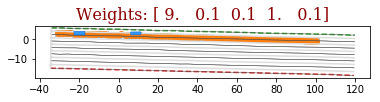

In [63]:
from bertha.helpers.helpermethods import reshaper
import numpy as np
from fvks.visualization.draw_dispatch import draw_object
print(len(sol.x))

xf = reshaper(sol.x)

plt.figure()
font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }
w_new = np.array2string(bertha.w)
plt.title('Weights: ' + w_new, fontdict=font)
x0_c = bertha.new_tr
plt.plot(x0_c[:, 0], x0_c[:, 1], '-x')
plt.plot(xf[:, 0], xf[:, 1], '-o')
plt.plot(bertha.pointsleft[:, 0], bertha.pointsleft[:,1], '--')
plt.plot(bertha.pointsright[:, 0], bertha.pointsright[:,1], '--')
draw_object(bertha.new_sim.scenario)
draw_object(bertha.final_state)
plt.gca().set_aspect('equal')
# plt.savefig(os.getcwd() + "/solution_pic/" + name + ".png")
plt.show()

In [39]:
import os
from datetime import datetime
plt.savefig(os.getcwd() + "/solution_pic/" + datetime.now().strftime("%I:%M%p on %B %d, %Y").replace(" ", "") + ".svg")